In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

"""
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4',
            'is_slippery': False}
)
"""
env = gym.make('FrozenLake8x8-v0')
#env = gym.make('FrozenLake-v3')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])

[2017-02-10 18:11:30,312] Making new env: FrozenLake8x8-v0


In [2]:
# Discount factor
dis = .99

In [3]:
# Set learning parameters
#num_episodes = 2000
num_episodes = 5000

# create list to contain total rewars and steps per episode
rList = []

In [4]:
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    e = 1. / ((i // 100) + 1) # // : python 2&3
    
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by egreedy
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
    
        # Get new state and reward from environment
        new_state, reward, done,_ = env.step(action)
    
        # Update Q-Table with new knowledge using learning rate
        Q[state,action] = reward + dis * np.max(Q[new_state,:])
    
        rAll += reward
        state = new_state
    
    rList.append(rAll)
    
    if (i % 100 == 0):
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


Success rate: 0.0
Finale Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. 

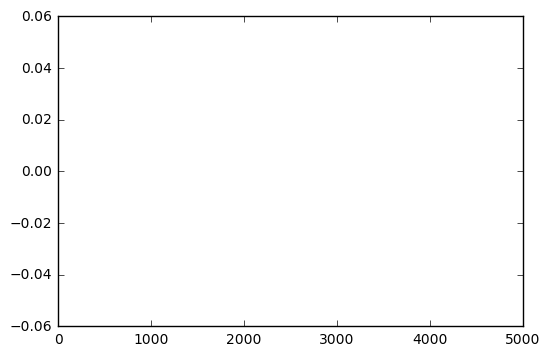

In [5]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Finale Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
#plt.bar(range(len(rList)), rList, color="blue")   # blue가 안먹네. (윈7) : edgecolor가 검은색
plt.bar(range(len(rList)), rList, color="blue", edgecolor="none")    # edgecolor를 none으로 하면 color가 나옴
plt.show()